# 105-2 Psychoinformatics and Neuroinformatics Final Project 
--------------------------------------------------------------------------------------------
<br>
<br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

import pickle

%matplotlib inline
matplotlib.style.use('ggplot')

---------------------------------------
<br>
<br>
## Data reading

In [2]:
feature = pd.read_csv('data/Psychofinal.csv')

In [3]:
feature.shape

(178, 27)

The dataset contains results of 178 subjects over 27 features.

In [4]:
feature.head()

,時間戳記,Dept,Sex,Age,Home,GPA,FB,1.自己通常,2.別人通常,3.自己應該,...,a7,b3,b5,b7,c3,c5,c7,d3,d5,d7
0,2017/5/23 下午 8:56:26,Eng,Male,20,South,3.0,吳孟軒,0_early,0_early,0_early,...,6.652000,2.900000,4.719000,6.687000,2.86800,4.660000,6.265000,2.85600,4.848000,6.58500
1,2017/5/23 下午 9:37:09,Bio,Female,18,North,3.0,子葳蘇,10_early,0_late,0_early,...,7.053885,2.789525,4.743895,7.006110,2.36662,4.850765,7.291415,2.80084,4.797375,7.02220
2,2017/5/23 下午 9:38:22,Eng,Male,21,North,2.0,NaN,10_early,0_late,0_early,...,7.998000,3.312000,5.014000,6.656000,2.68000,4.856000,6.792000,2.37200,4.984000,6.51100
3,2017/5/23 下午 9:44:12,Eng,Female,19,North,2.0,楊舒媛,0_early,0_late,0_early,...,6.944000,3.149000,4.859000,7.169000,3.00000,5.361000,6.834000,2.80200,5.066000,6.86900
4,2017/5/23 下午 9:44:59,Bio,Female,19,Middle,3.0,NaN,0_early,0_late,10_early,...,7.355795,3.099945,5.501730,8.665655,3.23273,5.502045,7.623655,3.13273,5.216860,7.53676


In [5]:
with open('data/header.pickle', 'rb') as f:
	header = pickle.load(f)

In [6]:
header

['Timestamp',
 'Dept',
 'Sex',
 'Age',
 'Home',
 'GPA',
 'FB',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'a3',
 'a5',
 'a7',
 'b3',
 'b5',
 'b7',
 'c3',
 'c5',
 'c7',
 'd3',
 'd5',
 'd7']

In [7]:
feature.columns = header

feature.head()

,Timestamp,Dept,Sex,Age,Home,GPA,FB,Q1,Q2,Q3,...,a7,b3,b5,b7,c3,c5,c7,d3,d5,d7
0,2017/5/23 下午 8:56:26,Eng,Male,20,South,3.0,吳孟軒,0_early,0_early,0_early,...,6.652000,2.900000,4.719000,6.687000,2.86800,4.660000,6.265000,2.85600,4.848000,6.58500
1,2017/5/23 下午 9:37:09,Bio,Female,18,North,3.0,子葳蘇,10_early,0_late,0_early,...,7.053885,2.789525,4.743895,7.006110,2.36662,4.850765,7.291415,2.80084,4.797375,7.02220
2,2017/5/23 下午 9:38:22,Eng,Male,21,North,2.0,NaN,10_early,0_late,0_early,...,7.998000,3.312000,5.014000,6.656000,2.68000,4.856000,6.792000,2.37200,4.984000,6.51100
3,2017/5/23 下午 9:44:12,Eng,Female,19,North,2.0,楊舒媛,0_early,0_late,0_early,...,6.944000,3.149000,4.859000,7.169000,3.00000,5.361000,6.834000,2.80200,5.066000,6.86900
4,2017/5/23 下午 9:44:59,Bio,Female,19,Middle,3.0,NaN,0_early,0_late,10_early,...,7.355795,3.099945,5.501730,8.665655,3.23273,5.502045,7.623655,3.13273,5.216860,7.53676


---------------------------------------
<br>
<br>
# Raw data analizing

In [8]:
feature.Dept.value_counts()

Eng    78
Lib    25
Sci    20
Bio    19
Law    15
Med    12
Man     9
Name: Dept, dtype: int64

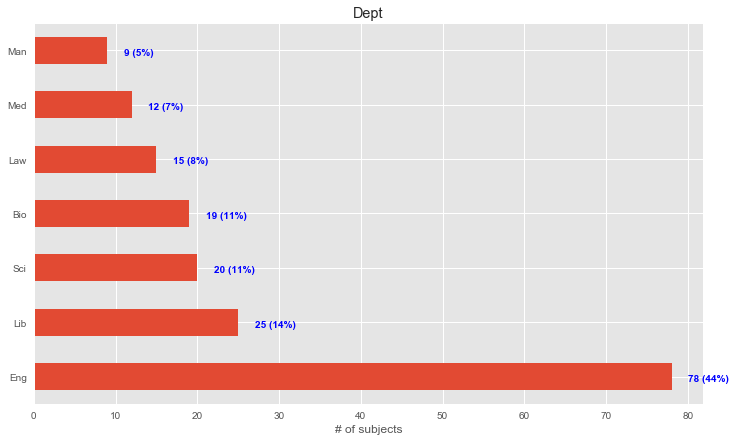

In [9]:
plt.figure(figsize=(12,7))
feature.Dept.value_counts().plot(kind='barh', width=0.5)
plt.title('Dept')
plt.xlabel('# of subjects')
for i, v in enumerate(feature.Dept.value_counts()):
	plt.text(v + 2, i - 0.08, '{:d} ({:.0f}%)'.format(v, 100*v/feature.Dept.count()), color='blue', fontweight='bold')

abbr. | dept             | # of subjects
----- | ---------------- | --------------
Man   | 管理學院          | 9 (5%)
Med   | 醫學院 / 公衛學院  | 12 (7%)
Law   | 社科院 / 法學院    | 15 (8%)
Bio   | 生科院 / 生農學院  | 19 (11%)
Sci   | 理學院            | 20 (11%)
Lib   | 文學院            | 25 (14%)
Eng   | 工學院 / 電資院    | 78 (44%)


In [10]:
feature.Sex.value_counts()

Male      110
Female     67
Other       1
Name: Sex, dtype: int64

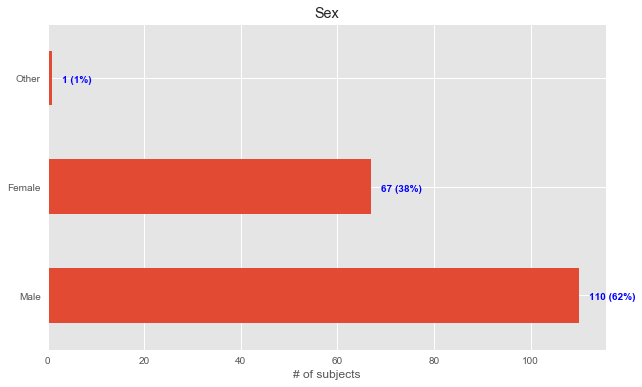

In [11]:
plt.figure(figsize=(10,6))
feature.Sex.value_counts().plot(kind='barh', width=0.5)
plt.title('Sex')
plt.xlabel('# of subjects')
for i, v in enumerate(feature.Sex.value_counts()):
	plt.text(v + 2, i - 0.04, '{:d} ({:.0f}%)'.format(v, 100*v/feature.Sex.count()), color='blue', fontweight='bold')

In [12]:
feature.Age.value_counts()

20    54
19    29
21    28
22    17
23    14
18     9
24     6
30     3
25     3
27     2
26     2
17     2
45     1
28     1
29     1
31     1
32     1
33     1
34     1
36     1
69     1
Name: Age, dtype: int64

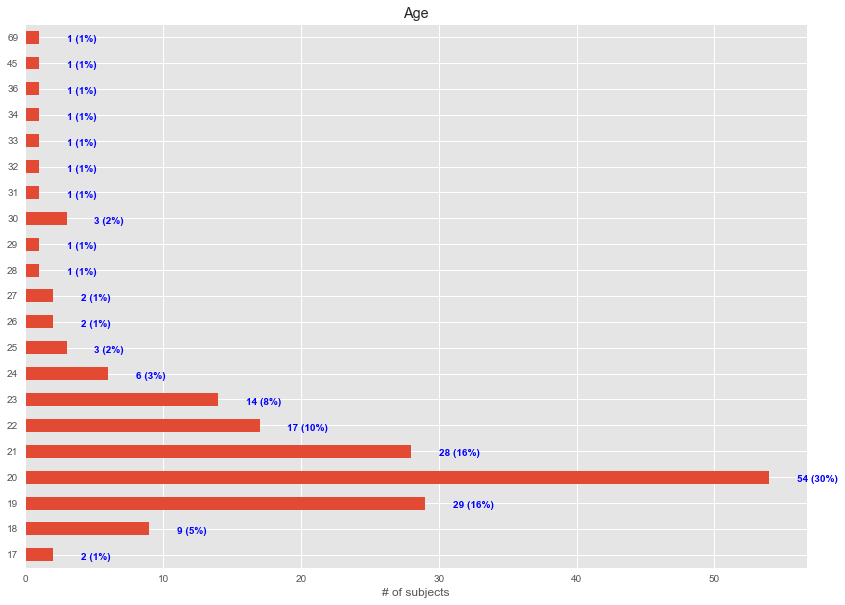

In [13]:
fig = plt.figure( figsize=(14,10) )
feature.Age.value_counts(sort=False).plot(kind='barh', width=0.5)
plt.title('Age')
plt.xlabel('# of subjects')
for i, v in enumerate(feature.Age.value_counts(sort=False)):
	plt.text(v + 2, i - 0.2, '{:d} ({:.0f}%)'.format(v, 100*v/feature.Age.count()), color='blue', fontweight='bold')

In [14]:
feature.Home.value_counts()

North     97
Middle    53
South     25
East       3
Name: Home, dtype: int64

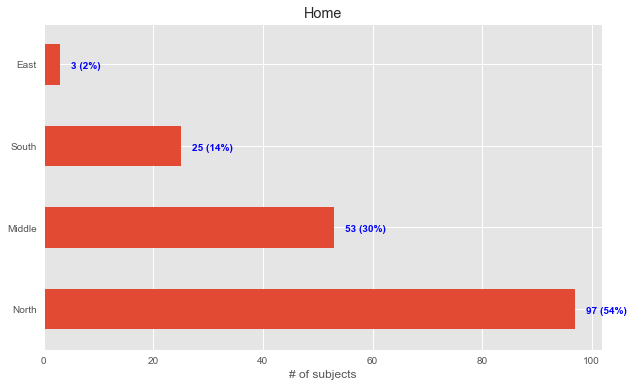

In [15]:
plt.figure(figsize=(10,6))
feature.Home.value_counts().plot(kind='barh', width=0.5)
plt.title('Home')
plt.xlabel('# of subjects')
for i, v in enumerate(feature.Home.value_counts()):
	plt.text(v + 2, i - 0.05, '{:d} ({:.0f}%)'.format(v, 100*v/feature.Home.count()), color='blue', fontweight='bold')

In [16]:
feature.GPA.value_counts()

3.0    93
4.0    33
2.0    23
0.0     7
1.0     5
Name: GPA, dtype: int64

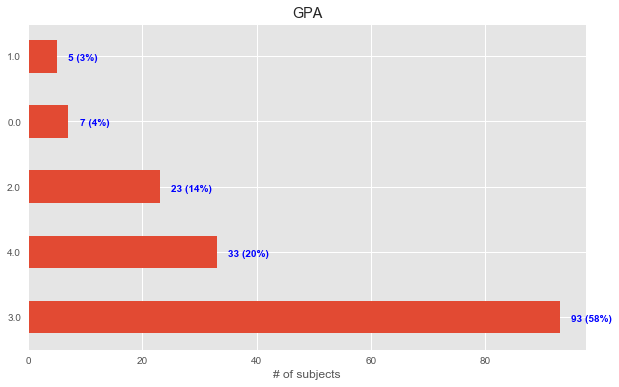

In [17]:
plt.figure(figsize=(10,6))
feature.GPA.value_counts().plot(kind='barh', width=0.5)
plt.title('GPA')
plt.xlabel('# of subjects')
for i, v in enumerate(feature.GPA.value_counts()):
	plt.text(v + 2, i - 0.065, '{:d} ({:.0f}%)'.format(v, 100*v/feature.GPA.count()), color='blue', fontweight='bold')

abbr. | GPA        | percentage  | # of subjects
----- | ---------- | ----------- | -------------
  0   | 0 ~ 1.7    |      - 60   |    7 (4%)
  1   | 1.7 ~ 2.3  |   60 - 69   |    5 (3%)
  2   | 2.3 ~ 3.3  |   69 - 79   |    23 (14%)
  3   | 3.3 ~ 4.0  |   79 - 89   |    93 (58%)
  4   | 4.0 ~ 4.3  |   89 -      |    33 (20%)

In [18]:
feature.Q1.value_counts()

0_early     96
0_late      48
10_early    27
10_late      4
20_early     3
Name: Q1, dtype: int64

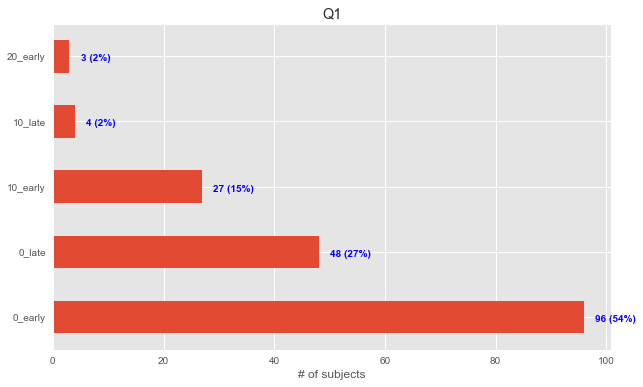

In [19]:
plt.figure(figsize=(10,6))
feature.Q1.value_counts().plot(kind='barh', width=0.5)
plt.title('Q1')
plt.xlabel('# of subjects')
for i, v in enumerate(feature.Q1.value_counts()):
	plt.text(v + 2, i - 0.065, '{:d} ({:.0f}%)'.format(v, 100*v/feature.Q1.count()), color='blue', fontweight='bold')

Q1.平常與人有約時，你 **通常** 會何時到約定的地點？
<br>

abbr.      | time range (min)  | # of subjects
---------- | ----------------- | -------------
 10_late   |   late 10 - 20    |    4 (2%)
 0_late    |   late  0 - 10    |    48 (27%)
 0_early   |  early  0 - 10    |    96 (54%)
 10_early  |  early 10 - 20    |    27 (15%)
 20_early  |  early 20 -       |    3 (2%)

In [20]:
feature.Q2.value_counts()

0_late      93
0_early     67
10_late     10
10_early     6
20_early     1
20_late      1
Name: Q2, dtype: int64

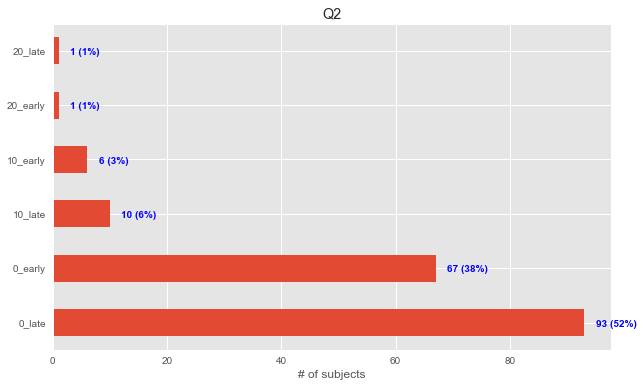

In [21]:
plt.figure(figsize=(10,6))
feature.Q2.value_counts().plot(kind='barh', width=0.5)
plt.title('Q2')
plt.xlabel('# of subjects')
for i, v in enumerate(feature.Q2.value_counts()):
	plt.text(v + 2, i - 0.065, '{:d} ({:.0f}%)'.format(v, 100*v/feature.Q2.count()), color='blue', fontweight='bold')

Q2.平常與人有約時，對方 **通常** 會何時到約定的地點？
<br>

abbr.      | time range (min)  | # of subjects
---------- | ----------------- | -------------
 20_late   |   late 20 -       |    1 (1%)
 10_late   |   late 10 - 20    |    10 (6%)
 0_late    |   late  0 - 10    |    93 (52%)
 0_early   |  early  0 - 10    |    67 (38%)
 10_early  |  early 10 - 20    |    6 (3%)
 20_early  |  early 20 -       |    1 (1%)

In [22]:
feature.Q3.value_counts()

0_early     141
10_early     23
0_late       11
20_early      3
Name: Q3, dtype: int64

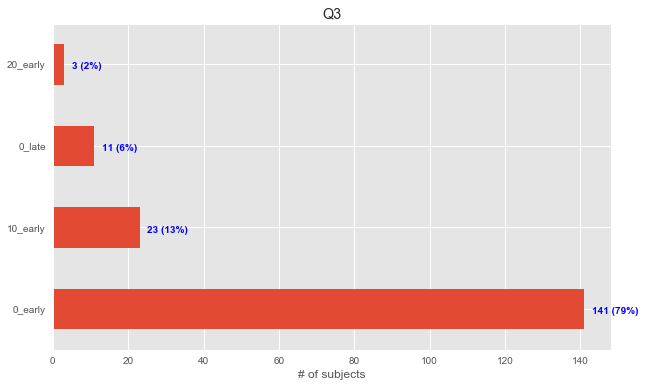

In [23]:
plt.figure(figsize=(10,6))
feature.Q3.value_counts().plot(kind='barh', width=0.5)
plt.title('Q3')
plt.xlabel('# of subjects')
for i, v in enumerate(feature.Q3.value_counts()):
	plt.text(v + 2, i - 0.055, '{:d} ({:.0f}%)'.format(v, 100*v/feature.Q3.count()), color='blue', fontweight='bold')

Q3.平常與人有約時，你 **覺得自己應該** 何時到約定的地點？
<br>

abbr.      | time range (min)  | # of subjects
---------- | ----------------- | -------------
 0_late    |   late  0 - 10    |    11 (6%)
 0_early   |  early  0 - 10    |    141 (79%)
 10_early  |  early 10 - 20    |    23 (13%)
 20_early  |  early 20 -       |    3 (2%)

In [24]:
feature.Q4.value_counts()

0_early     114
0_late       47
10_early     11
20_early      5
10_late       1
Name: Q4, dtype: int64

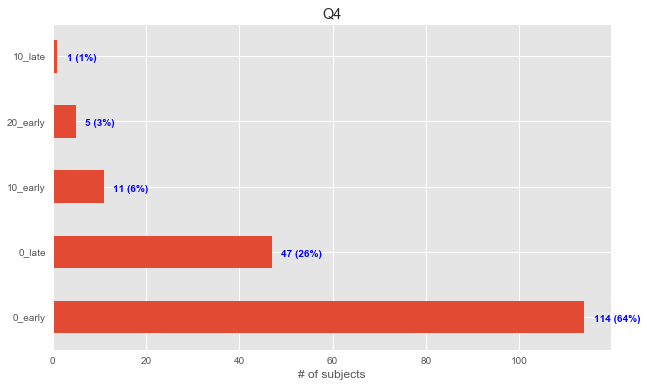

In [25]:
plt.figure(figsize=(10,6))
feature.Q4.value_counts().plot(kind='barh', width=0.5)
plt.title('Q4')
plt.xlabel('# of subjects')
for i, v in enumerate(feature.Q4.value_counts()):
	plt.text(v + 2, i - 0.065, '{:d} ({:.0f}%)'.format(v, 100*v/feature.Q4.count()), color='blue', fontweight='bold')

Q4.平常與人有約時，你 **覺得別人應該** 何時到約定的地點？
<br>

abbr.      | time range (min)  | # of subjects
---------- | ----------------- | -------------
 10_late   |   late 10 - 20    |    1 (1%)
 0_late    |   late  0 - 10    |    47 (26%)
 0_early   |  early  0 - 10    |    114 (64%)
 10_early  |  early 10 - 20    |    11 (6%)
 20_early  |  early 20 -       |    5 (3%)

In [26]:
feature.Q5.value_counts()

sometimes    83
seldom       53
usually      29
always        7
never         6
Name: Q5, dtype: int64

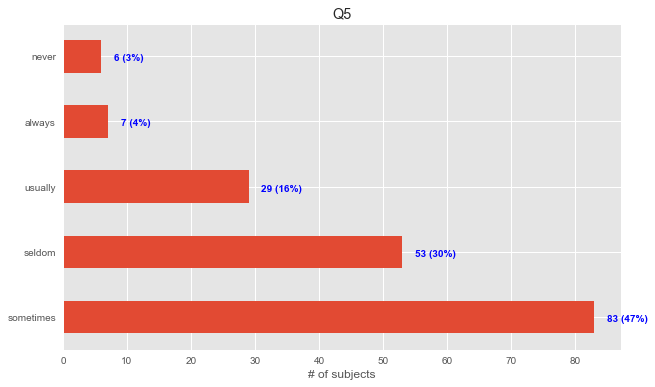

In [27]:
plt.figure(figsize=(10,6))
feature.Q5.value_counts().plot(kind='barh', width=0.5)
plt.title('Q5')
plt.xlabel('# of subjects')
for i, v in enumerate(feature.Q5.value_counts()):
	plt.text(v + 2, i - 0.065, '{:d} ({:.0f}%)'.format(v, 100*v/feature.Q5.count()), color='blue', fontweight='bold')

Q5. 你 **覺得自己** 遲到的情況？

In [28]:
feature.Q6.value_counts()

seldom       81
sometimes    55
usually      23
never        11
always        8
Name: Q6, dtype: int64

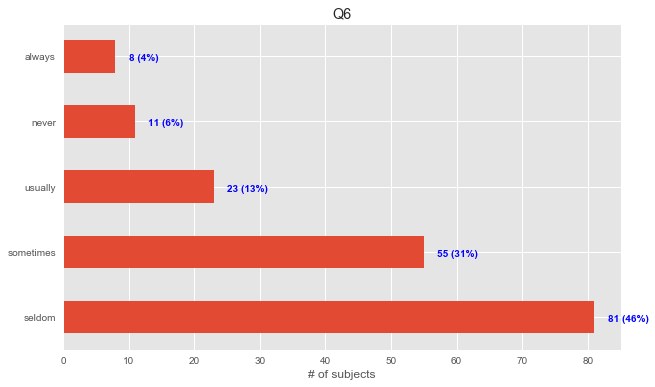

In [29]:
plt.figure(figsize=(10,6))
feature.Q6.value_counts().plot(kind='barh', width=0.5)
plt.title('Q6')
plt.xlabel('# of subjects')
for i, v in enumerate(feature.Q6.value_counts()):
	plt.text(v + 2, i - 0.065, '{:d} ({:.0f}%)'.format(v, 100*v/feature.Q6.count()), color='blue', fontweight='bold')

Q6. 你身邊的家人朋友都如何 **評論你** 遲到的頻率？

In [30]:
feature.Q7.value_counts()

10    81
20    46
0     26
30    25
Name: Q7, dtype: int64

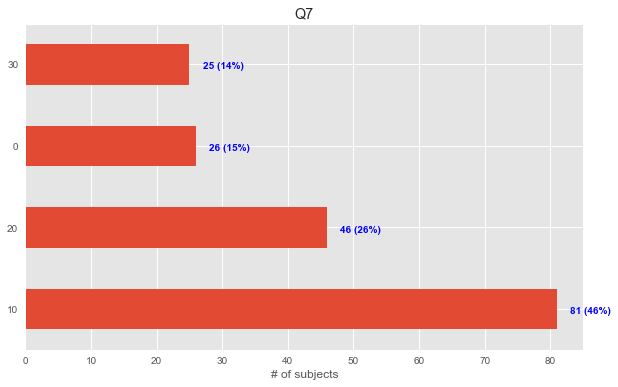

In [31]:
plt.figure(figsize=(10,6))
feature.Q7.value_counts().plot(kind='barh', width=0.5)
plt.title('Q7')
plt.xlabel('# of subjects')
for i, v in enumerate(feature.Q7.value_counts()):
	plt.text(v + 2, i - 0.055, '{:d} ({:.0f}%)'.format(v, 100*v/feature.Q7.count()), color='blue', fontweight='bold')

Q7. 你最多能忍受 **別人** 遲到多久？
<br>

abbr. | time range (min)  | # of subjects
----- | ----------------- | -------------
 0    |      0 - 10       |  26 (15%)
 10   |     10 - 20       |  81 (46%)
 20   |     20 - 30       |  46 (26%)
 30   |     30 -          |  25 (14%)

In [32]:
feature.Q8.value_counts()

0     142
10     34
20      2
Name: Q8, dtype: int64

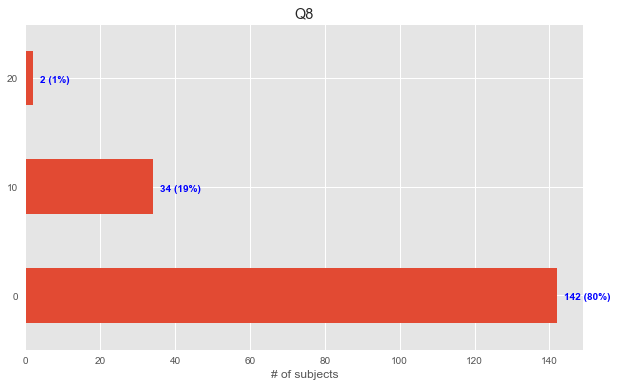

In [33]:
plt.figure(figsize=(10,6))
feature.Q8.value_counts().plot(kind='barh', width=0.5)
plt.title('Q8')
plt.xlabel('# of subjects')
for i, v in enumerate(feature.Q8.value_counts()):
	plt.text(v + 2, i - 0.04, '{:d} ({:.0f}%)'.format(v, 100*v/feature.Q8.count()), color='blue', fontweight='bold')

Q8. 你覺得 **自己** 合理的遲到時間？
<br>

abbr. | time range (min)  | # of subjects
----- | ----------------- | -------------
 0    |      0 - 10       |  142 (80%)
 10   |     10 - 20       |  34 (19%)
 20   |     20 - 30       |  2 (1%)

In [34]:
feature.ix[:, 'a3':'d7'].describe()

,a3,a5,a7,b3,b5,b7,c3,c5,c7,d3,d5,d7
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,3.252428,4.900629,6.984490,3.032813,4.889219,6.934254,2.977629,4.896741,6.848229,2.929839,4.890612,6.941755
std,4.307900,0.604596,1.487144,0.635906,0.528907,0.744525,0.411062,0.488081,0.748791,0.496917,0.602112,1.003700
min,0.078000,1.379615,3.100205,1.901600,3.203835,3.607865,1.716400,3.345050,3.489845,0.160065,0.904000,0.053920
25%,2.781000,4.659726,6.531458,2.746316,4.601144,6.582341,2.776710,4.620888,6.476501,2.709136,4.630696,6.533770
50%,2.969410,4.933525,6.908397,2.986485,4.880498,6.958810,2.979000,4.877458,6.833843,2.942283,4.912648,7.003010
75%,3.159237,5.216333,7.293750,3.257500,5.164188,7.230842,3.218983,5.197597,7.227235,3.143628,5.177179,7.488631
max,60.159000,6.368000,24.065000,9.676110,6.400235,9.151890,4.175175,6.798185,9.644950,5.111800,6.495900,10.229265


---------------------------------------
<br>
<br>
## Data processing

In [35]:
feature.loc[ feature.Age < 18, 'Age' ] = 0
feature.loc[ (feature.Age >= 18) & (feature.Age < 21), 'Age' ] = 1
feature.loc[ (feature.Age >= 21) & (feature.Age < 24), 'Age' ] = 2
feature.loc[ feature.Age >= 24, 'Age' ] = 3

feature.Age.value_counts()

1    92
2    59
3    25
0     2
Name: Age, dtype: int64

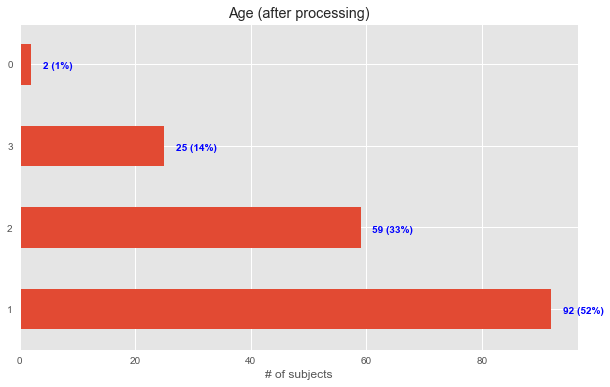

In [36]:
plt.figure(figsize=(10,6))
feature.Age.value_counts().plot(kind='barh', width=0.5)
plt.title('Age (after processing)')
plt.xlabel('# of subjects')
for i, v in enumerate(feature.Age.value_counts()):
	plt.text(v + 2, i - 0.055, '{:d} ({:.0f}%)'.format(v, 100*v/feature.Age.count()), color='blue', fontweight='bold')

abbr. | age range (years old)  | # of subjects
----- | ---------------------- | -------------
  0   |         - 17           |  2 (1%)
  1   |      18 - 20           |  92 (52%)
  2   |      21 - 23           |  59 (33%)
  3   |      24 -              |  25 (25%)

In [37]:
feature = feature.replace( ['20_late', '10_late', '0_late', '0_early', '10_early', '20_early'], [-3, -2, -1, 1, 2, 3] )

feature = feature.replace( ['never', 'seldom', 'sometimes', 'usually', 'always'], list(range(5)) )

label | abbr.
----- | --------
 -3   | 20_late
 -2   | 10_late
 -1   | 0_late
  1   | 0_early
  2   | 10_early
  3   | 20_early

<br>

label | abbr.
----- | ---------
  0   | never
  1   | seldom
  2   | sometimes
  3   | usually
  4   | always

In [38]:
real = np.array([3,5,7]*4)
dirty = np.round(0.05*feature.shape[0]).astype("int") + 1

Drop 5% of each feature (from 'a3' to 'd7').

In [39]:
for i, ft in enumerate(header[-12:]):
	raw = feature[ft].values
	raw = np.abs(raw - real[i])
	raw.sort()
	bound = raw[-dirty]
	feature.loc[ (feature[ft] > real[i] + bound) | (feature[ft] < real[i] - bound) , ft ] = np.nan

In [40]:
feature.ix[:, 'a3':'d7'].describe()

,a3,a5,a7,b3,b5,b7,c3,c5,c7,d3,d5,d7
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,2.971247,4.946550,6.920803,2.982568,4.910821,6.911367,2.994522,4.910762,6.871880,2.955540,4.916724,7.064952
std,0.292294,0.423718,0.590022,0.337018,0.441139,0.589648,0.345949,0.390364,0.539499,0.352507,0.413278,0.655992
min,2.229710,4.010000,5.482880,2.189600,3.905995,5.341325,2.148000,4.008940,5.596765,2.159360,3.904070,5.275220
25%,2.801235,4.682000,6.583825,2.751465,4.627235,6.589680,2.793000,4.632025,6.503840,2.748000,4.655925,6.601740
50%,2.977375,4.938140,6.911795,2.983230,4.889535,6.938000,2.984000,4.889000,6.834000,2.950000,4.913960,7.024595
75%,3.159760,5.210430,7.284000,3.230000,5.161750,7.184000,3.215000,5.179125,7.220000,3.132730,5.165935,7.491000
max,3.665425,6.124695,8.600410,3.776830,6.111230,8.589000,3.925220,5.847000,8.271000,3.979000,6.070150,8.943540


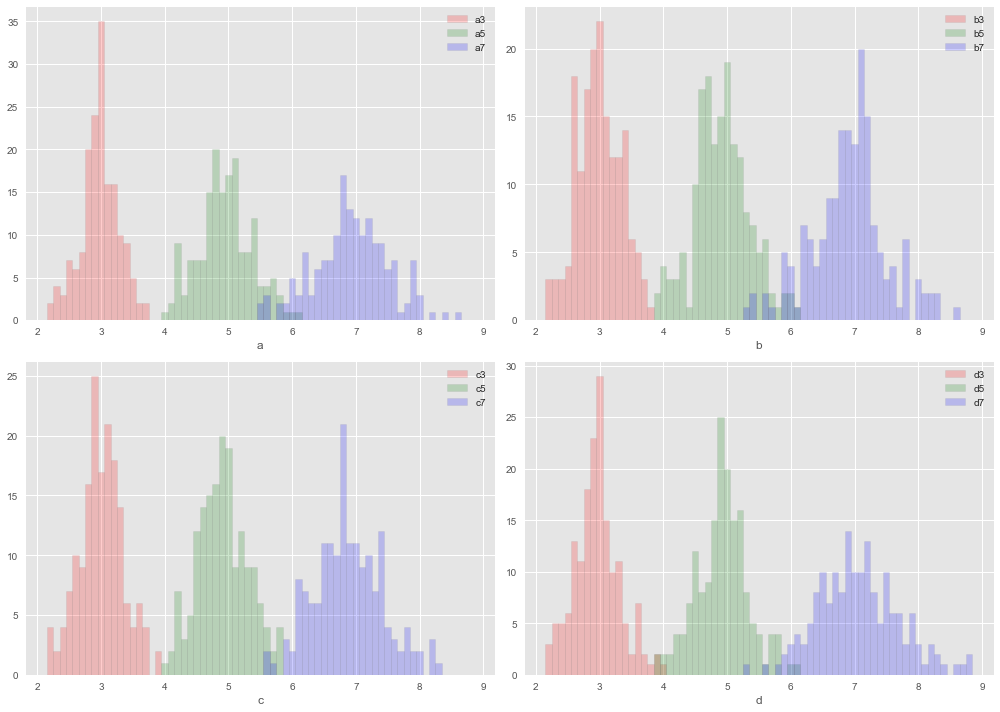

In [41]:
df = feature.ix[:, 'a3':'d7']
MIN = df.min().min()
MAX = df.max().max()
bins = np.arange(MIN, MAX, 0.1)
c = ['r', 'g', 'b']

fig = plt.figure( figsize=(14,10) )
for i in range(4):
	ax = fig.add_subplot(2, 2, i+1)
	for k, ft in enumerate(header[i*3+15:(i+1)*3+15]):
		ax.hist(df[ft].dropna(), color=c[k], bins=bins, alpha=0.2, edgecolor='gray')
	plt.xlabel( header[i*3+15][0] )
	plt.tight_layout()
	plt.legend( header[i*3+15:(i+1)*3+15] )

In [42]:
for i, ft in enumerate(header[-12:]):
	feature.loc[ :, ft ] = feature.ix[:, ft] - real[i]

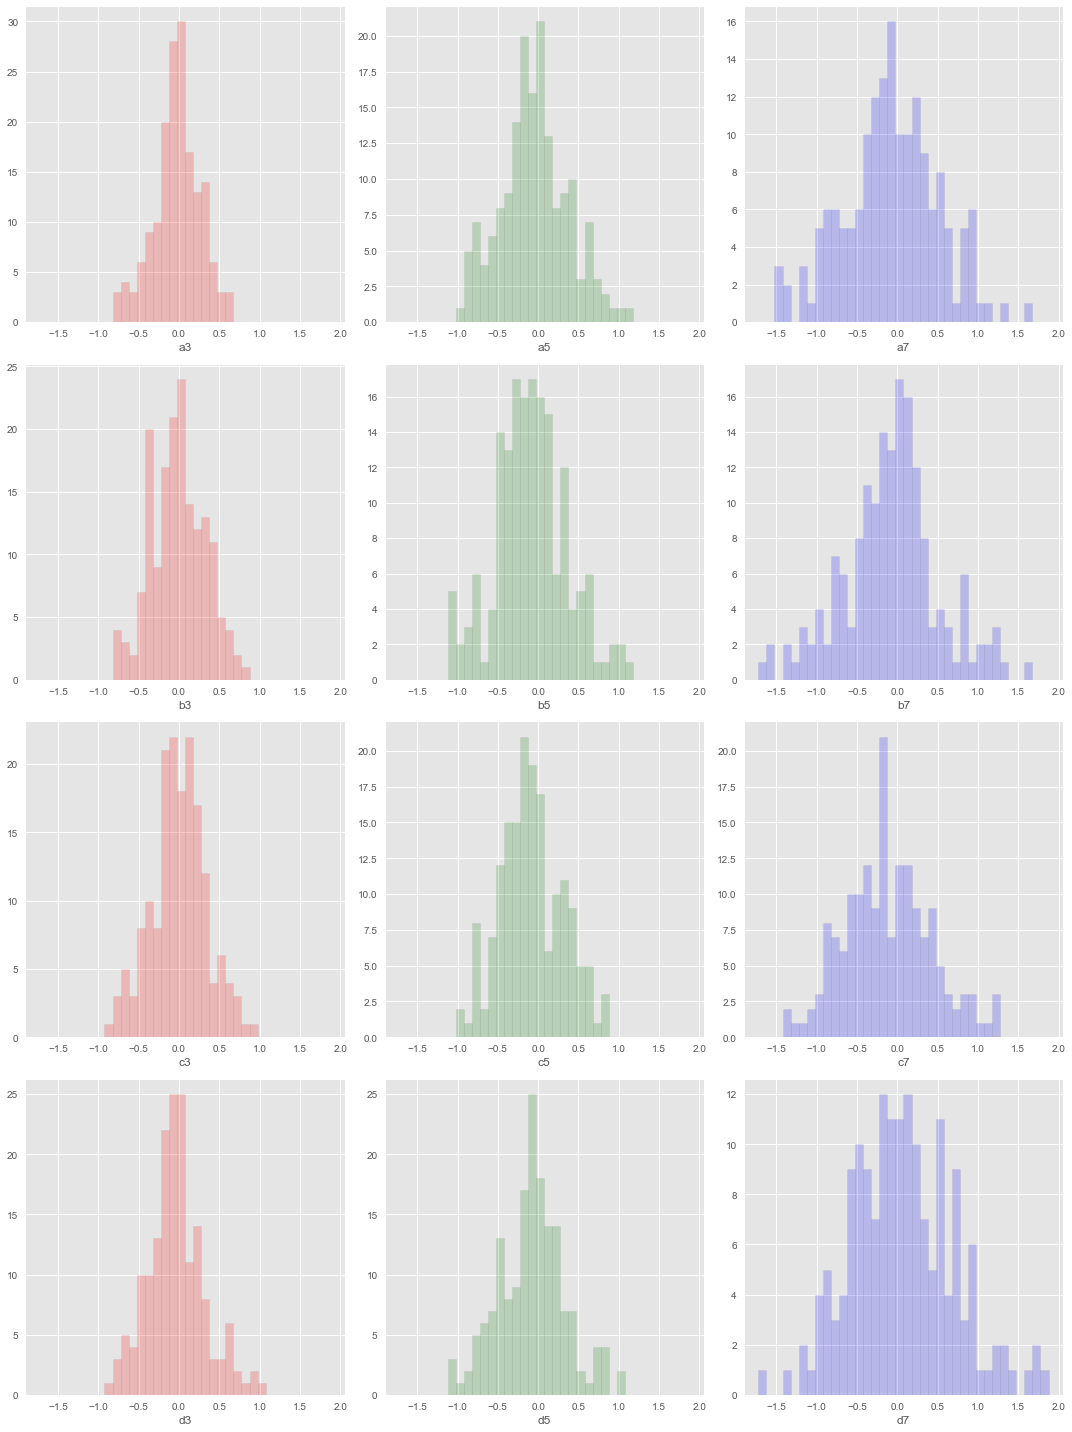

In [43]:
df = feature.ix[:, 'a3':'d7']
MIN = df.min().min()
MAX = df.max().max()
bins = np.arange(MIN, MAX, 0.1)
c = ['r', 'g', 'b']

fig = plt.figure( figsize=(15,20) )
for i, ft in enumerate(header[-12:]):
	ax = fig.add_subplot(4, 3, i+1)
	ax.hist(df[ft].dropna(), color=c[i%3], bins=bins, alpha=0.2, edgecolor='gray')
	plt.xlabel( ft )
	plt.tight_layout()

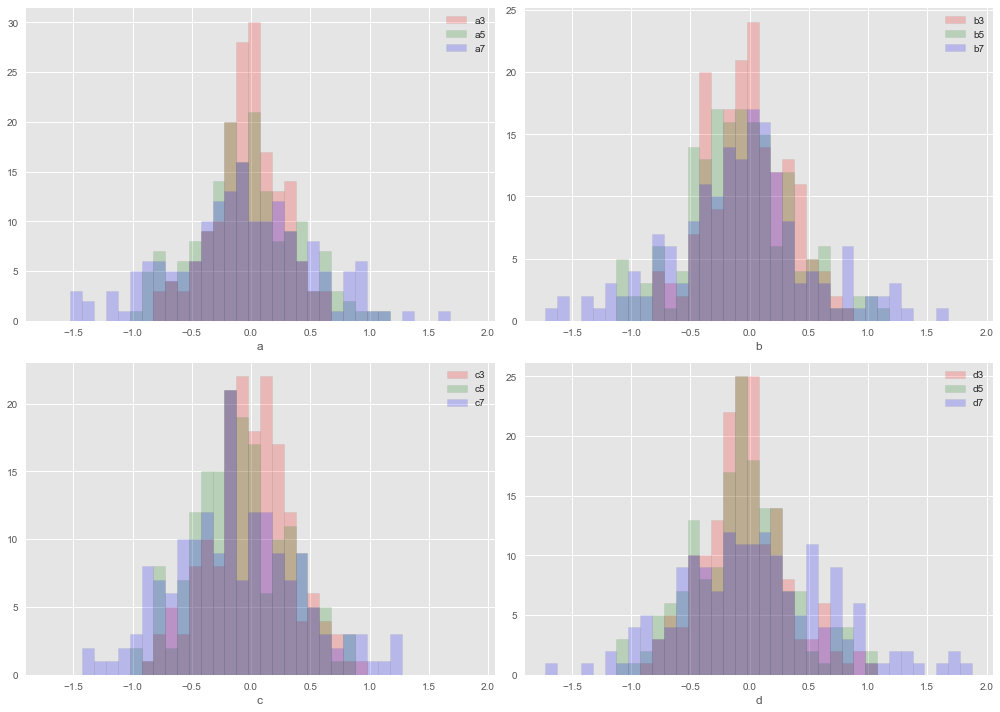

In [44]:
fig = plt.figure( figsize=(14,10) )
for i in range(4):
	ax = fig.add_subplot(2, 2, i+1)
	for k, ft in enumerate(header[i*3+15:(i+1)*3+15]):
		ax.hist(df[ft].dropna(), color=c[k], bins=bins, alpha=0.2, edgecolor='gray')
	plt.xlabel( header[i*3+15][0] )
	plt.tight_layout()
	plt.legend( header[i*3+15:(i+1)*3+15] )

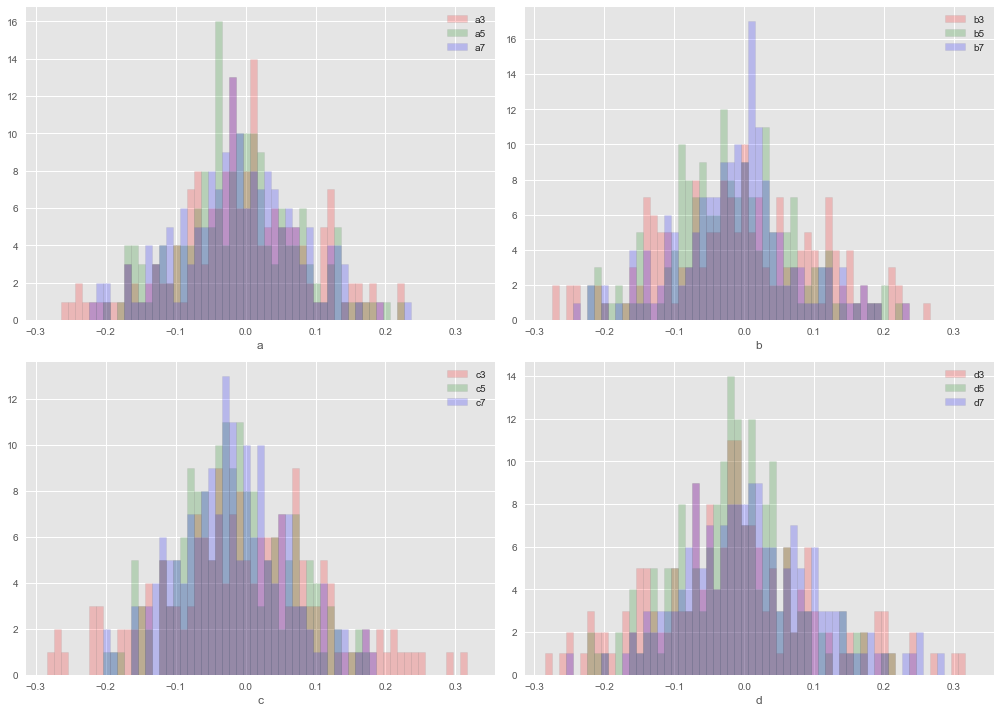

In [45]:
df = feature.ix[:, 'a3':'d7']
for i, ft in enumerate(header[-12:]):
	df.loc[ :, ft ] = df.ix[:, ft] / real[i]

MIN = df.min().min()
MAX = df.max().max()
bins = np.arange(MIN, MAX, 0.01)
c = ['r', 'g', 'b']

fig = plt.figure( figsize=(14,10) )
for i in range(4):
	ax = fig.add_subplot(2, 2, i+1)
	for k, ft in enumerate(header[i*3+15:(i+1)*3+15]):
		ax.hist(df[ft].dropna(), color=c[k], bins=bins, alpha=0.2, edgecolor='gray')
	plt.xlabel( header[i*3+15][0] )
	plt.tight_layout()
	plt.legend( header[i*3+15:(i+1)*3+15] )

---------------------------------------
<br>
<br>
## Processed data analizing

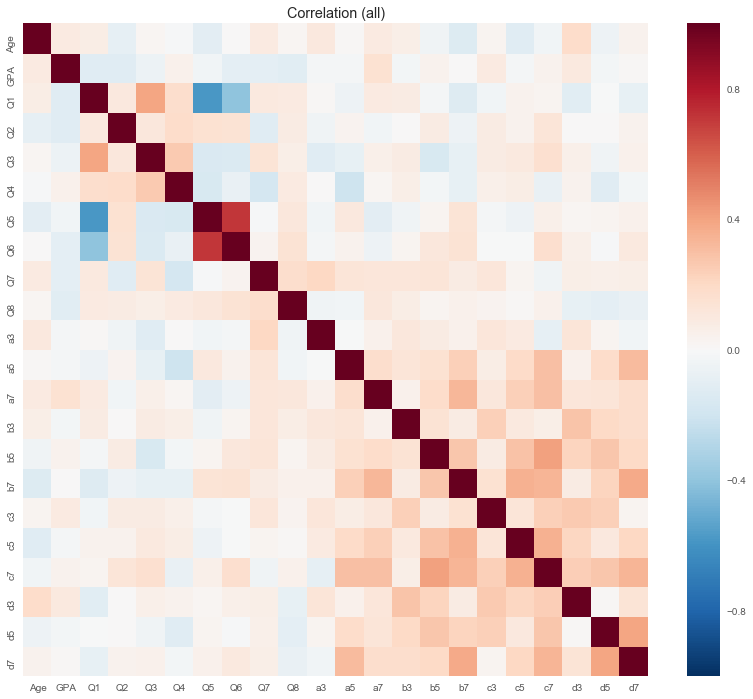

In [46]:
fig = plt.figure( figsize=(14,12) )
plt.title('Correlation (all)')
corr = feature.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

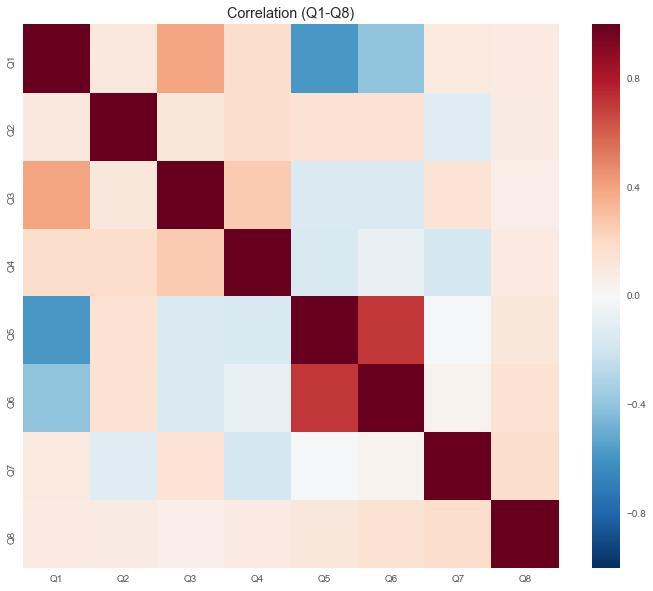

In [47]:
fig = plt.figure( figsize=(12,10) )
plt.title('Correlation (Q1-Q8)')
corr = feature.ix[:, 'Q1':'Q8'].corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

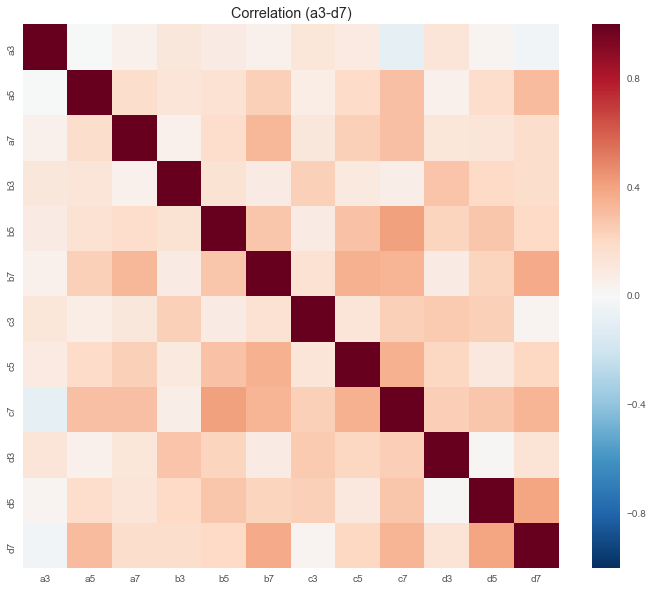

In [48]:
fig = plt.figure( figsize=(12,10) )
plt.title('Correlation (a3-d7)')
corr = feature.ix[:, 'a3':'d7'].corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [55]:
from scipy import stats

df = feature.drop(['Timestamp', 'FB'], axis=1).dropna()

stats.f_oneway(df['a3'], df['b3'], df['c3'], df['d3'])

F_onewayResult(statistic=0.59127791036658595, pvalue=0.62098942636409238)

In [56]:
stats.f_oneway(df['a5'], df['b5'], df['c5'], df['d5'])

F_onewayResult(statistic=0.17987766270591818, pvalue=0.91003823971794351)

In [57]:
stats.f_oneway(df['a7'], df['b7'], df['c7'], df['d7'])

F_onewayResult(statistic=1.0667406702870903, pvalue=0.36293251255025627)

Group by 4 different pictures.
<br>

sec. | p-value
---- | -------
 3   |  0.621
 5   |  0.910
 7   |  0.363

In [58]:
df_m = df[df.Sex == 'Male'].copy()
df_f = df[df.Sex == 'Female'].copy()

stats.f_oneway(df_m['a3'], df_m['b3'], df_m['c3'], df_m['d3'])

F_onewayResult(statistic=0.34519668494929195, pvalue=0.79265775081169354)

In [59]:
stats.f_oneway(df_m['a5'], df_m['b5'], df_m['c5'], df_m['d5'])

F_onewayResult(statistic=0.83292001844318009, pvalue=0.47673627406603614)

In [60]:
stats.f_oneway(df_m['a7'], df_m['b7'], df_m['c7'], df_m['d7'])

F_onewayResult(statistic=0.55521304325660703, pvalue=0.64504845928213095)

In [61]:
stats.f_oneway(df_f['a3'], df_f['b3'], df_f['c3'], df_f['d3'])

F_onewayResult(statistic=0.47187716502791943, pvalue=0.70231522618625175)

In [62]:
stats.f_oneway(df_f['a5'], df_f['b5'], df_f['c5'], df_f['d5'])

F_onewayResult(statistic=0.49112506573592746, pvalue=0.68894590511270137)

In [63]:
stats.f_oneway(df_f['a7'], df_f['b7'], df_f['c7'], df_f['d7'])

F_onewayResult(statistic=0.83525920115230023, pvalue=0.47641232855168514)

Group by 4 different pictures.
Seperated by Sex.
<br>

sec. |  Male   | Female
---- | ------- | ------
 3   |  0.793  | 0.702
 5   |  0.477  | 0.689
 7   |  0.645  | 0.476 